### Notebook 4: Four Point Plotting
This notebook shows how one might go about plotting four-point probe data, including the thickness and the composition.

In [1]:
import sys
import pandas as pd
sys.path.append('..\lib')
from library import Library
from sample import Sample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

Using the Sample.search_by_ids function within the Sample class, we can create a list of all the samples within our library, then query just the data associated with the four point mapping instrumentation. This includes sheet resistance (fpm_sheet_resistance), resistivity (fpm_resistivity) and conductivity (fpm_conductivity). Notice that resistivity and conductivity are inversely related.

In [2]:
fpm_list = []
for i in Sample.search_by_ids(list(Library(6701).properties().position_ids)[0]):
    fpm_list.append(i.properties()[['xrf_compounds','xrf_concentration','position',\
                                    'fpm_sheet_resistance','fpm_resistivity','fpm_conductivity']])

Once all of the data has been extracted, we then do a bit of manipulation to get each of these properties in a list form, which will make sorting and graphing easier.

In [3]:
xrf_concentrations = [list(i.xrf_concentration)[0] for i in fpm_list]
positions = [int(i.position) for i in fpm_list]
fpm_sheet_resistances = [float(i.fpm_sheet_resistance) for i in fpm_list]
fpm_resistivity = [float(i.fpm_resistivity) for i in fpm_list]
fpm_conductivity = [float(i.fpm_conductivity) for i in fpm_list]

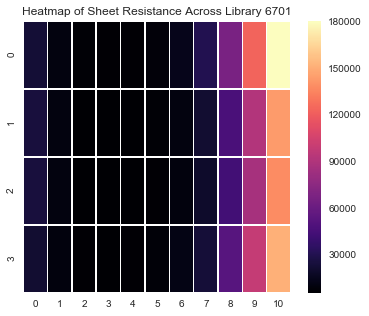

In [4]:
sheet_resistance_graph = sorted(zip(positions,fpm_sheet_resistances))
sheet_resistance_graph = [i[1] for i in sheet_resistance_graph]
sheet_resistance_graph_array = np.array(sheet_resistance_graph).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(sheet_resistance_graph_array, linewidths=.5, ax=ax,cmap = 'magma')
plt.title('Heatmap of Sheet Resistance Across Library 6701')
plt.show()

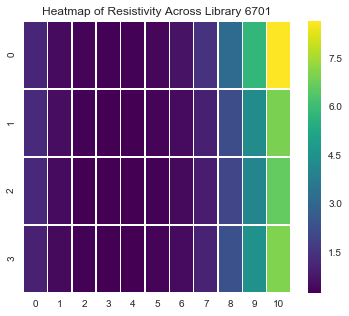

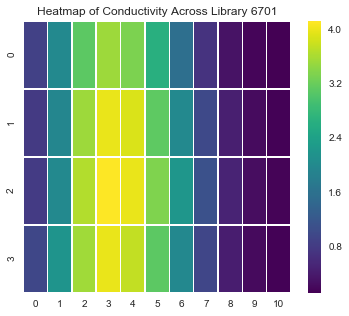

In [5]:
resistivity_graph = sorted(zip(positions,fpm_resistivity))
resistivity_graph = [i[1] for i in resistivity_graph]
resistivity_graph_array = np.array(resistivity_graph).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(resistivity_graph_array, linewidths=.5, ax=ax,cmap = 'viridis')
plt.title('Heatmap of Resistivity Across Library 6701')
plt.show()

conductivity_graph = sorted(zip(positions,fpm_conductivity))
conductivity_graph = [i[1] for i in conductivity_graph]
conductivity_graph_array = np.array(conductivity_graph).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conductivity_graph_array, linewidths=.5, ax=ax,cmap = 'viridis')
plt.title('Heatmap of Conductivity Across Library 6701')
plt.show()

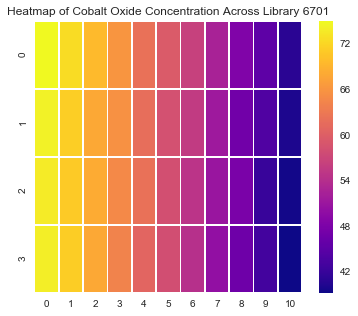

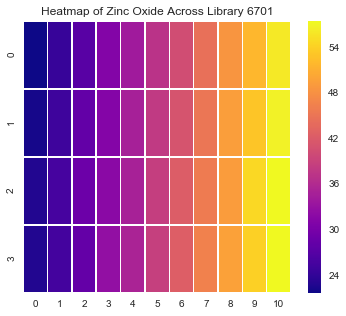

In [6]:
elements_graph = sorted(zip(positions,xrf_concentrations))
elements_2_graph = [i[1][1] for i in elements_graph]
elements_2_graph_array = np.array(elements_2_graph).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(elements_2_graph_array, linewidths=.5, ax=ax,cmap = 'plasma')
plt.title('Heatmap of Cobalt Oxide Concentration Across Library 6701')
plt.show()

elements_graph = sorted(zip(positions,xrf_concentrations))
elements_3_graph = [i[1][2] for i in elements_graph]
elements_3_graph_array = np.array(elements_3_graph).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(elements_3_graph_array, linewidths=.5, ax=ax,cmap = 'plasma')
plt.title('Heatmap of Zinc Oxide Across Library 6701')
plt.show()

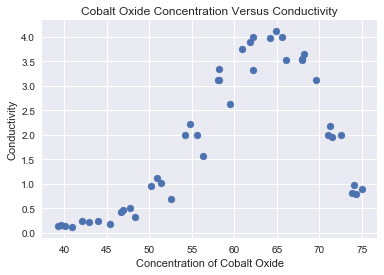

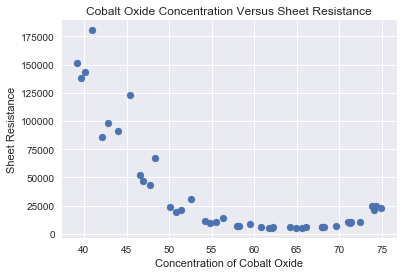

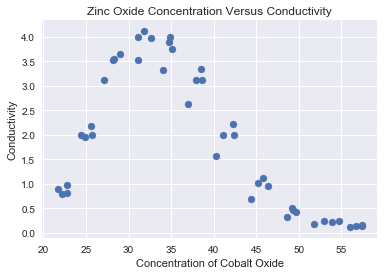

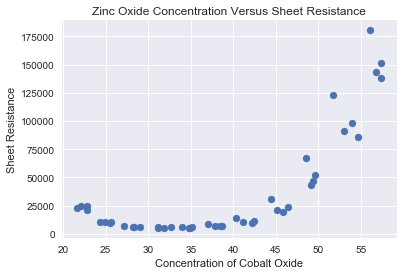

In [7]:
plt.figure()
plt.title('Cobalt Oxide Concentration Versus Conductivity')
plt.xlabel('Concentration of Cobalt Oxide')
plt.ylabel('Conductivity')
plt.scatter(elements_2_graph,conductivity_graph)
plt.show()

plt.figure()
plt.title('Cobalt Oxide Concentration Versus Sheet Resistance')
plt.xlabel('Concentration of Cobalt Oxide')
plt.ylabel('Sheet Resistance')
plt.scatter(elements_2_graph,sheet_resistance_graph)
plt.show()


plt.figure()
plt.title('Zinc Oxide Concentration Versus Conductivity')
plt.xlabel('Concentration of Cobalt Oxide')
plt.ylabel('Conductivity')
plt.scatter(elements_3_graph,conductivity_graph)
plt.show()

plt.figure()
plt.title('Zinc Oxide Concentration Versus Sheet Resistance')
plt.xlabel('Concentration of Cobalt Oxide')
plt.ylabel('Sheet Resistance')
plt.scatter(elements_3_graph,sheet_resistance_graph)
plt.show()